In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors as nei
import sklearn.svm as svm
import random as rm

In [2]:
n=50.0
rok=[]
roktest=[]

for i in range(int(n)):
    for s in range(int(n)):
        j=rm.random()*8-4
        k=rm.random()*8-4
        rok.append([j,k])

X=np.asarray(rok)
Y=[]
for x in rok:
    resp=0
    lens=[ 4]
    con2=0
    for m in [[0,0]]:  
        con=0
        i=0
        for s in x:
            i=i+(s-m[con])**2
            con=con+1
        if i<=lens[con2]:
            resp=1
        con2=con2+1
    Y.append([resp])
Y=np.asarray(Y)
X=np.asarray(X)

for i in range(int(n)):
    for s in range(int(n)):
        j=rm.random()*8-4
        k=rm.random()*8-4
        roktest.append([j,k])

Xtest=np.asarray(roktest)
Ytest=[]
for x in roktest:
    resp=0
    lens=[ 4]
    con2=0
    for m in [[0,0]]:  
        con=0
        i=0
        for s in x:
            i=i+(s-m[con])**2
            con=con+1
        if i<=lens[con2]:
            resp=1
        con2=con2+1
    Ytest.append([resp])
Ytest=np.asarray(Ytest)
Xtest=np.asarray(Xtest)

n=100.0
rok=[]
for i in range(int(n)):
    for s in range(int(n)):
        j=(i/n)*8-4
        k=(s/n)*8-4
        rok.append([j,k])

Colors=np.asarray(rok)

[[ 0.99993372]]
[[-3.17726278  0.12349792 -4.32907343  4.26505184 -2.41997218  3.1746428
  -3.07735133  0.12916079 -0.11337238]
 [ 2.83111525 -0.01814591 -0.79445434 -1.64973283 -3.08525705  3.02646136
   0.93110394  3.85917401 -4.29627132]]
Accuracy for NN: 
0.9916
Accuracy for Svc (linear kernel): 
0.7896
Accuracy for Svc (rbf kernel): 
0.9928


/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


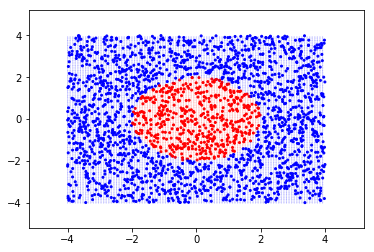

In [3]:
accuracies=[]
input_size=2
for mid in [9]:
    middle_size=mid
    output_layer_size=1
    #Los placeholders son para los datos de entrada
    x = tf.placeholder(tf.float32, [None, input_size])
    y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
    #La variables para lo que se va a ir calculando y modificando en el camino
    W_layer1=tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
    W_layer2=tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer2")
    b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")
    b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")
    y = tf.nn.sigmoid(tf.matmul(tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1),W_layer2)+b_layer2) #la de nuestra
    lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
    #lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
    # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)
    init = tf.global_variables_initializer()
    sess = tf.Session() # tipo de sesion, puede ser interactiva
    sess.run(init)
    for i in range(2000):
      sess.run(train_step, feed_dict={x: X, y_: Y})
    #imprimir alguna variable
    print(sess.run(y, feed_dict={x:[[1,0]]}))
    print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))
    Colors_y=sess.run(y, feed_dict={x:Colors})
    correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracies.append(sess.run(accuracy, feed_dict={x: X, y_: Y}))
    print("Accuracy for NN: ")
    print(sess.run(accuracy, feed_dict={x: Xtest, y_: Ytest})) # las corremos
    print("Accuracy for Svc (linear kernel): ")
    svc=svm.SVC(kernel='linear')
    svc.fit(X, Y)
    print(svc.score(Xtest,Ytest)) 
    print("Accuracy for Svc (rbf kernel): ")
    svc=svm.SVC()
    svc.fit(X, Y)
    print(svc.score(Xtest,Ytest)) 
    plt.scatter(Xtest[:,0],Xtest[:,1],c=['red' if i==1 else 'blue' for i in Ytest], s=4)
    plt.scatter(Colors[:,0],Colors[:,1],c=['red' if np.round(i)==1 else 'blue' for i in Colors_y], s=0.015)
    x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
    plt.ylim([-5.2,5.2])
    plt.xlim([-5.2,5.2])
    plt.show()
    plt.clf()
    sess.close()

NN are much better than an SVC with a linear kernel. Nonetheless, an AVC with rbf kernel 